## Clustering: k-means and linkage-based clustering

Student: Alessandro Valente 

Id: 1234429

In this notebook we are going to practice with the k-means and the linkage-based (called "agglomerative" in scikit learn) clustering algorithms.

In particular you are going to implement the k-means algorithm from scratch and to compare the results with the implementation already present in the sklearn library.

In [1]:
# Load the required packages
# If a package is missing in your setup, install it with 'conda install <package_name>' 
# or with 'pip install <package_name>'
%matplotlib inline  

import math
import numpy as np
import scipy as sp
import imageio as imio
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

from mpl_toolkits.mplot3d import Axes3D #3d plotting functions
from matplotlib import pyplot
from PIL import Image

from copy import deepcopy  #deepcopy ensures that a copy of all the object data is performed (not just the pointers)

print ('scikit-learn version: ', sklearn.__version__)

scikit-learn version:  0.20.3


## TO DO:
    
Place your ID number in the ID variable, it will be used as random seed (as usual the random seed can affect a little bit the results, try to change it)

In [2]:
# fix your ID ("numero di matricola") and the seed for random generator
ID =   1234429
np.random.seed(ID)

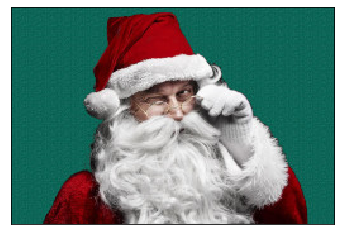

Santa Claus image:  (172, 256, 3)


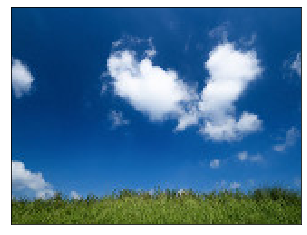

Landscape image:  (120, 160, 3)


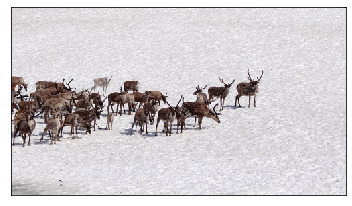

Reindeer image:  (281, 500, 3)


In [3]:
# load the provided images and display them (if you like you can experiment with other images)
image1 = imio.imread('data/santaclaus2.jpg')
image2  = imio.imread("data/landscape.jpg")
image3  = imio.imread("data/reindeer.jpg")



ax = plt.axes(xticks=[], yticks=[])
ax.imshow(image1)
plt.show()
print("Santa Claus image: ",image1.shape)

ax2 = plt.axes(xticks=[], yticks=[])
ax2.imshow(image2)
plt.show()
print("Landscape image: ",image2.shape)

ax3 = plt.axes(xticks=[], yticks=[])
ax3.imshow(image3)
plt.show()
print("Reindeer image: ",image3.shape)

We are going to start by using the Santa Claus image.


In [4]:
# reshape the data to a matrix of num_pixels x 3 
# (divide by 255 to have colors in [0 1] range for plotting functions of sklearn)

data = image1.reshape(image1.shape[0]*image1.shape[1], 3)/255

print(data.shape)
print(data)

(44032, 3)
[[0.05490196 0.4        0.34509804]
 [0.05098039 0.39607843 0.34117647]
 [0.05098039 0.39607843 0.34117647]
 ...
 [0.05882353 0.40392157 0.34901961]
 [0.05882353 0.40392157 0.34901961]
 [0.05882353 0.40392157 0.34901961]]


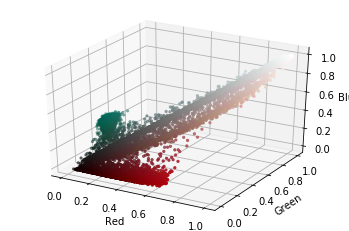

In [5]:
# Plot the points in the 3-dimensional space with normalized intervals between 0 and 1
# (corresponding to the three channels of the image, i.e. Red Green and Blue)

fig = pyplot.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
r, g, b = list(data[:,0]), list(data[:,1]), list(data[:,2])

axis.scatter(r, g, b, c=data, s=5, marker="o")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
pyplot.show()

## TO DO 1
Implement the k-means algorithm manually (**do not use the kmeans function of sklearn and do not download implementations from other web sources**). The inputs to the function is the set of vectors to be clustered and the number of clusters. The output must contain the clusters barycenters, a vector associating each data point to the corresponding cluster and the error (value of the cost function) at each iteration.
Additionally, fix a maximum number of iterations of the k-means algorithm (e.g., 50).

Be careful about the initalization, you can use some random points from the training set, or get random values but ensure they are in the proper range. Poor initalizations can lead to the failure of the algorithm (in particular check that no cluster is initialized as empty, otherwise the algorithm can not update it).

In [6]:
def distance (x,y):
    s=0
    for a,b in zip(x,y):
        s+=(a-b)**2
    return math.sqrt(s)

def my_kmeans(points, k):
    max_iters=50
    
    l=len(points)
    start_center=np.random.randint(0, l, k)
    
    cluster=np.ones((l,1)) #need this shape to use hstack after
    #now associate each point to a cluster
    for i in range(l):
        cluster[i]=np.argmin([distance(points[i], points[j]) for j in start_center])
    
    centroids=np.zeros((k,3))
    error=np.zeros(max_iters)
    for iteraction in range(max_iters):
        #make new centroids
        for i in range(k): #loop over centers
            new_center=np.zeros(3)
            counts=0
            for j in range(l): #loop over points
                if cluster[j]==i :  #check cluster-center correspondence
                    new_center[0]+=points[j][0]
                    new_center[1]+=points[j][1]
                    new_center[2]+=points[j][2]
                    counts+=1
            centroids[i][0]=new_center[0]/counts
            centroids[i][1]=new_center[1]/counts
            centroids[i][2]=new_center[2]/counts
            #print(centroids)
        
        #make new cluster correspondence
        for i in range(l):
            cluster[i]=np.argmin([distance(points[i], centroids[j]) for j in range(k)])
        #compute errors
        dist=0
        for i in range(l):
            for j in range(k):
                if cluster[i]==j:
                    dist+=distance(points[i], centroids[j])
        error[iteraction]=dist
        print("end iter ", iteraction)
    
    clusters=np.hstack((points,cluster))
    #clusters=cluster
    return centroids, clusters, error



## TO DO 2:

Now try the function you developed on the Santa Claus image with three clusters (k=3). 

Then plot the data points in the 3-dimensional space, each point must be coloured based on the membership to one of the clusters. Additionally, plot the respective clusters centroids (use a different shape, size or color to highlight the centroids).

In [7]:
#print(data)
mykmeans_centers,clusters,error = my_kmeans(data,3)

end iter  0
end iter  1
end iter  2
end iter  3
end iter  4
end iter  5
end iter  6
end iter  7
end iter  8
end iter  9
end iter  10
end iter  11
end iter  12
end iter  13
end iter  14
end iter  15
end iter  16
end iter  17
end iter  18
end iter  19
end iter  20
end iter  21
end iter  22
end iter  23
end iter  24
end iter  25
end iter  26
end iter  27
end iter  28
end iter  29
end iter  30
end iter  31
end iter  32
end iter  33
end iter  34
end iter  35
end iter  36
end iter  37
end iter  38
end iter  39
end iter  40
end iter  41
end iter  42
end iter  43
end iter  44
end iter  45
end iter  46
end iter  47
end iter  48
end iter  49


[[0.39262661 0.05386229 0.0671155 ]
 [0.77998175 0.77044226 0.76776639]
 [0.07859449 0.39470509 0.34315436]]


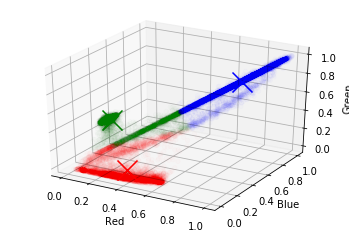

In [8]:
fig = pyplot.figure()

print(mykmeans_centers)
rcl=clusters[clusters[:,3]==0]
bcl=clusters[clusters[:,3]==1]
gcl=clusters[clusters[:,3]==2]

axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.set_xlabel("Red")
axis.set_zlabel("Green")
axis.set_ylabel("Blue")

axis.scatter(rcl[:,0],rcl[:,1],rcl[:,2],c='red', cmap='viridis', zorder=0, alpha=0.01)
axis.scatter(bcl[:,0],bcl[:,1],bcl[:,2],c='blue', cmap='viridis', zorder=0, alpha=0.01 )
axis.scatter(gcl[:,0],gcl[:,1],gcl[:,2],c='green', cmap='viridis', zorder=0, alpha=0.01 )

#axis.scatter(r, g, b, marker="o", c=clusters, s=1, cmap='viridis', zorder=0, alpha=0.5 )
axis.scatter(mykmeans_centers[0,0],mykmeans_centers[0,1],mykmeans_centers[0,2],  c='red', s=400, zorder=10, marker="x")
axis.scatter(mykmeans_centers[1,0],mykmeans_centers[1,1],mykmeans_centers[1,2],  c='blue', s=400, zorder=10, marker="x")
axis.scatter(mykmeans_centers[2,0],mykmeans_centers[2,1],mykmeans_centers[2,2],  c='green', s=400, zorder=10, marker="x")

pyplot.show()

### TO DO 3: 
Plot the value of the error versus the number of iterations

Text(0, 0.5, 'error')

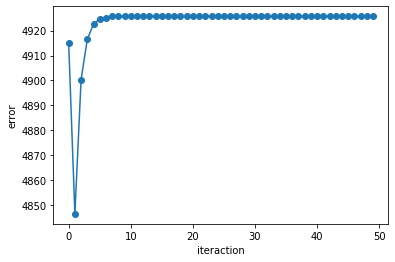

In [9]:
plt.plot( np.arange(0,50,1), error, marker='o')
plt.xlabel("iteraction")
plt.ylabel("error")


### TO DO 4:
Now use the k-means function provided in sklearn. Pass to the function the number of clusters and use multiple random initializations (n_init parameter). Go to the documentation page for further details

In [10]:
kmeans = KMeans(3, n_init=20, max_iter=50)
kmeans.fit(data)

spclusters=np.hstack((data, kmeans.labels_.reshape(len(kmeans.labels_),1)))
spcenters=kmeans.cluster_centers_

### TO DO 5:
Perform the same plot as above but with the output of the k-means function provided in sklearn.

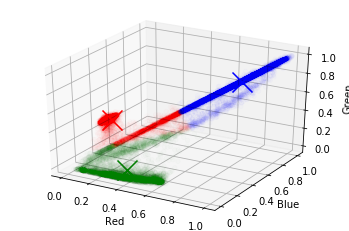

In [11]:
sprcl=spclusters[spclusters[:,3]==0]
spbcl=spclusters[spclusters[:,3]==1]
spgcl=spclusters[spclusters[:,3]==2]

fig = pyplot.figure()

axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.set_xlabel("Red")
axis.set_zlabel("Green")
axis.set_ylabel("Blue")

axis.scatter(sprcl[:,0],sprcl[:,1],sprcl[:,2],c='red', cmap='viridis', zorder=0, alpha=0.01)
axis.scatter(spbcl[:,0],spbcl[:,1],spbcl[:,2],c='blue', cmap='viridis', zorder=0, alpha=0.01 )
axis.scatter(spgcl[:,0],spgcl[:,1],spgcl[:,2],c='green', cmap='viridis', zorder=0, alpha=0.01 )

#axis.scatter(r, g, b, marker="o", c=clusters, s=1, cmap='viridis', zorder=0, alpha=0.5 )
axis.scatter(spcenters[0,0],spcenters[0,1],spcenters[0,2],  c='red', s=400, zorder=10, marker="x")
axis.scatter(spcenters[1,0],spcenters[1,1],spcenters[1,2],  c='blue', s=400, zorder=10, marker="x")
axis.scatter(spcenters[2,0],spcenters[2,1],spcenters[2,2],  c='green', s=400, zorder=10, marker="x")

pyplot.show()

## Question 1: 

Compare the results obtained with your implementation and with k-means from sklearn. Do you observe any differences, i.e., do the two plots match? 

[ADD YOUR ANSWER HERE]

The two plots matches in their result aside from the swap of red and green color ( which is not an issue since the colors are initialized "by hand").
The most important difference between the two is that my version take much more time to be executed menaing that there are many ways to optimize the execution.
The only "worrying" part is that in the error plot the error seems to reach an asyntotic value higher than the error it had in other iteretions, this is probably an error due to some improvements that should be done in my implementation.

Despite this the results are the same as the K-mean provided by scipy as we can see from the images below

**NOTE**
In my algorithm i did not put a control for the initialization of the cluster centers because with my seed the centers are well generated (i checked by hand) but that could be easy implemented with a while loop    

### TO DO 6:

Now display the segmented image based on the 3 clusters found above with both the k-means functions by sklearn and your k-means implementation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


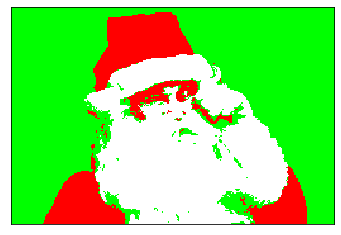

In [12]:
my_image=np.zeros(data.shape)
l=data.shape[0]

for i in range(l):
    if clusters[i,3]==0 :
        my_image[i]=[255,0,0]
    if clusters[i,3]==1 :
        my_image[i]=[255,255,255]
    if clusters[i,3]==2 :
        my_image[i]=[0,255,0]
    
my_image=my_image.reshape((172, 256, 3))
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(my_image)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


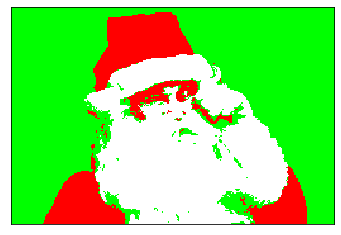

In [13]:
sp_image=np.zeros(data.shape)
l=data.shape[0]

for i in range(l):
    if spclusters[i,3]==0 :
        sp_image[i]=[255,0,0]
    if spclusters[i,3]==1 :
        sp_image[i]=[255,255,255]
    if spclusters[i,3]==2 :
        sp_image[i]=[0,255,0]
    
sp_image=sp_image.reshape((172, 256, 3))
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(my_image)
plt.show()

## Question 2: 

What do you observe? Do you think clustering is useful for image segmenation? And for image compression?  Comment your answer.

[ADD YOUR ANSWER HERE] 

I can clearly see that the pricipal color clusters of the image are easily recognized by the algorithm so clustering is surely useful to segment the image especially for using it for other Machine Learing purposes. When we use a big number of centroids ( as below) in particular we can see that the image segmentation is very effective and the reconstructed image is also nice.

On the other hand the use of clustering for image compression is surely effective but the "true" image cannot be broght back so it would be useful only for very big data set specifically meant for classification-like tasks but in general i this that clustering is not the optimal solution for image compression


## TO DO 8:

Now load the landscape image (optional: try also with the reindeer image) and segment it using kmeans with k varying from 2 to 15 clusters. You can use the sklearn implementation.

Then plot the resulting data points in the 3-dimensional space, each point must be colored based on the cluster membership. 
Additionally, plot the respective clusters centroids.



(19200, 3)


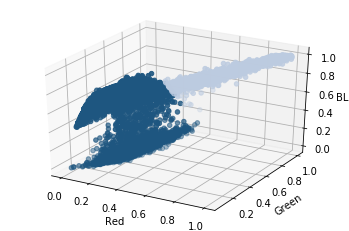

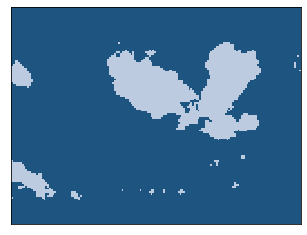

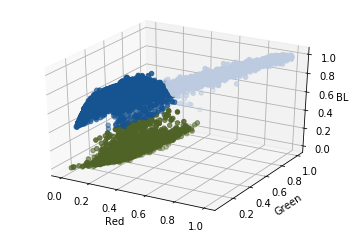

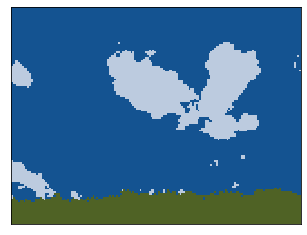

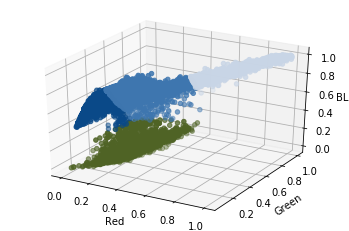

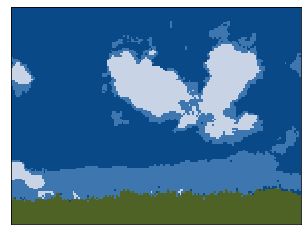

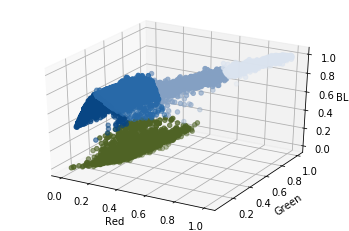

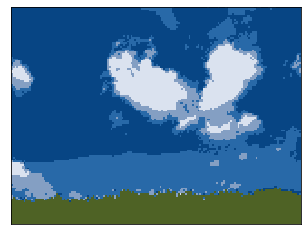

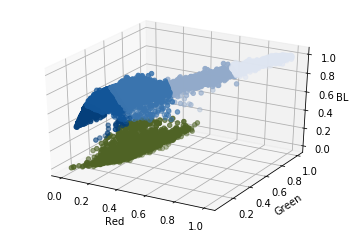

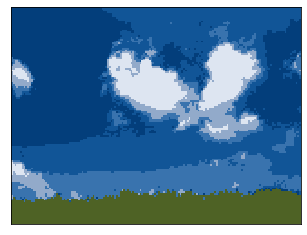

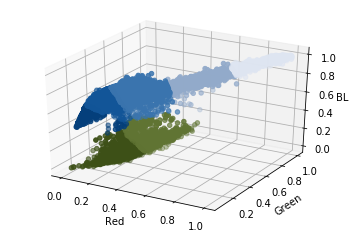

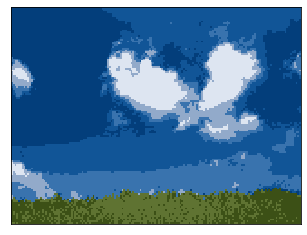

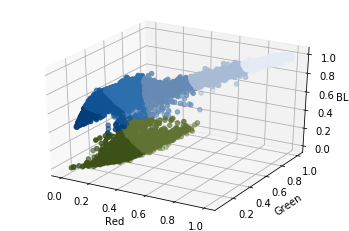

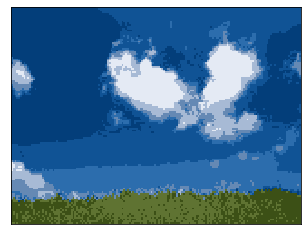

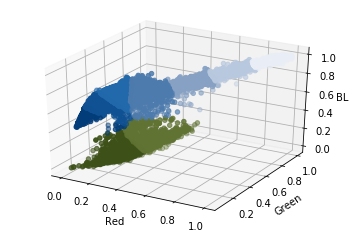

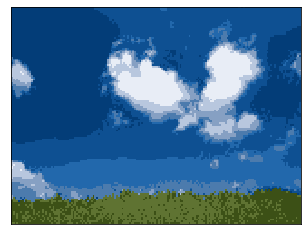

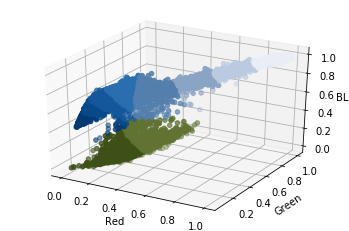

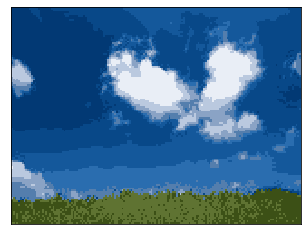

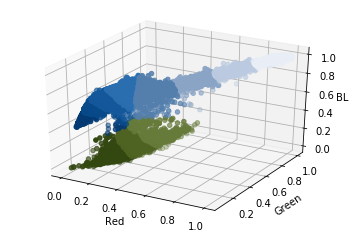

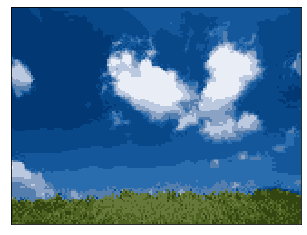

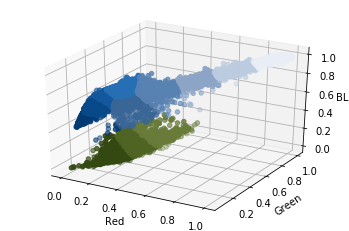

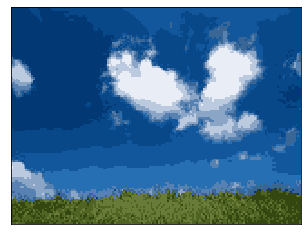

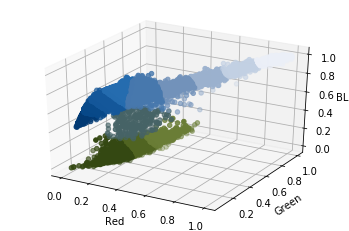

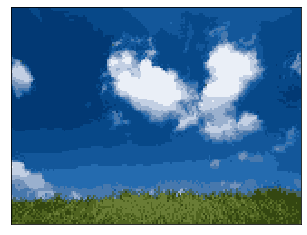

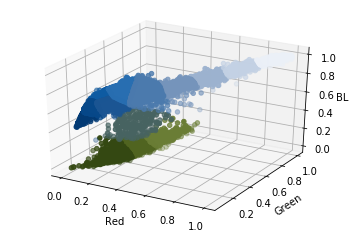

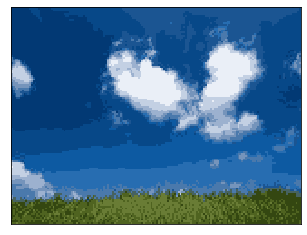

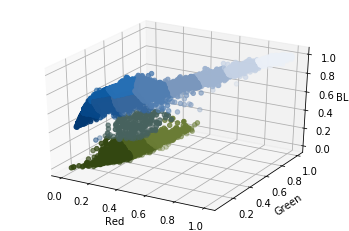

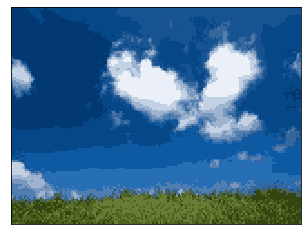

In [14]:
data = image2.reshape(image2.shape[0]*image2.shape[1], 3) / 255
print(data.shape)


for k in range(2,16):
    kmeans = KMeans(k, n_init=20, max_iter=50)
    kmeans.fit(data)
    
    clusters=np.hstack((data, kmeans.labels_.reshape(len(kmeans.labels_),1)))
    centers=kmeans.cluster_centers_
   
    
    fig=pyplot.figure()
    axis = fig.add_subplot(1, 1, 1, projection="3d")
    axis.set_xlabel("Red")
    axis.set_zlabel("BLue")
    axis.set_ylabel("Green")
    
    for i in range(k):
        sc=data[kmeans.labels_==i]
        axis.scatter(sc[:,0],sc[:,1],sc[:,2], color=centers[i])
    
    pyplot.show()
  
    clusters = kmeans.labels_.reshape(120,160)
    sp_image = np.zeros((120,160,3))
    for i in range(k):
        sp_image[clusters == i] = centers[i]
    ax = plt.axes(xticks=[], yticks=[])
    ax.imshow(sp_image);
    pyplot.show()
    

## TO DO 9:

Plot for different values of k (e.g. k between 2 and 15) the respective error of the kmeans algorithm 

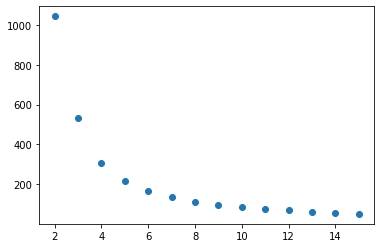

In [15]:
plt.plot(np.arange(2,16, 1), [KMeans(k,max_iter=50).fit(data).inertia_ for k in range(2,16)],
         linestyle='None', marker='o') 

##  Question 3:

Compare the results with different values of k, what do you observe? 

Analyze also the error, which one do you think is the optimal value of k ?

Is there a single, clear answer ? 

[ADD YOUR ANSWERS HERE]


Increasing the number of centroid the error decreases significantly as we expect, looking at the plot we could say that the opimal value of k is around 12 since that is the zone were the error starts going asyntothically.

I cannot give a single clear answer since is obvios that the error would decrease increasing the value of k but at a certain point we would incurr in some "overfitting" problems which can lead to a bad clusterization.

## Linkage-based clustering

The second part of the assignment concern instead linkage-based clustering. We will use the AgglomerativeClustering module of sklearn. 

In [16]:
# Import required packages
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics, datasets
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# Load sample data
data = np.load('data/moon_data.npz')
print(data.files)
X = data['X']
labels_true = data['labels_true']

['X', 'labels_true']


### TO DO 10: 

Now exploit the AgglomerativeClustering algorithm on the provided sample data points. Use the "single" linkage type that correspond to the minimum distance criteria seen in the lectures and 2 clusters. Notice that the "single" option has been introduced recently in sklearn, if you get an error ensure you have a recent version of the library. Plot the resulting clustering.

In [17]:
# #############################################################################
# Compute Agglomerative Clustering

db = AgglomerativeClustering( linkage="single", n_clusters=2)
db.fit(X)    
 

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='single', memory=None, n_clusters=2,
            pooling_func='deprecated')

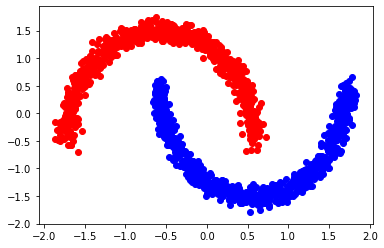

In [18]:
# Plot result

clusters=np.hstack((X, db.labels_.reshape(len(X),1)))
r=clusters[clusters[:,2]==0]
b=clusters[clusters[:,2]==1]
plt.scatter(r[:,0],r[:,1],color="red")
plt.scatter(b[:,0],b[:,1],color="blue")

### TO DO 11: 

Now try the KMeans with two clusters on the same dataset we used for the AgglomerativeClustering algorithm.

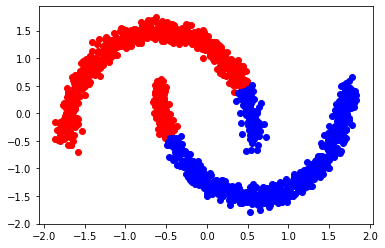

In [19]:
kmeans = KMeans(2, n_init=20, max_iter=50)
kmeans.fit(X)
clusters=np.hstack((X, kmeans.labels_.reshape(len(X),1)))
centers=kmeans.cluster_centers_
r=clusters[clusters[:,2]==0]
b=clusters[clusters[:,2]==1]
plt.scatter(r[:,0],r[:,1],color="red")
plt.scatter(b[:,0],b[:,1],color="blue")

## Question 4:

Compare the results of K-means and Agglomerative Clustering and explain what you observe and why?



[ADD YOUR ANSWER HERE]

As expected the K means algorithm is not able to distinguish the 2 cluster properly since it is "specialized" for linear clusterization.
The cluster is this case however are not linear (they are more likely parabolic) so the agglomerative cluster algorithm is a better choice since it is "specialyzed" for cases of non euclidian distances and cases of interconnections.